In [1]:
import os
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%load_ext lab_black

In [2]:
cv2.__version__

'4.2.0'

# Read File

In [3]:
img = cv2.imread("original/019_85%.jpg", cv2.IMREAD_GRAYSCALE)

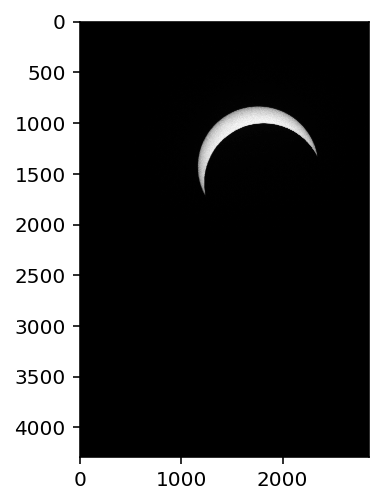

In [4]:
plt.imshow(img, cmap="gray")
plt.show()

# Threshold

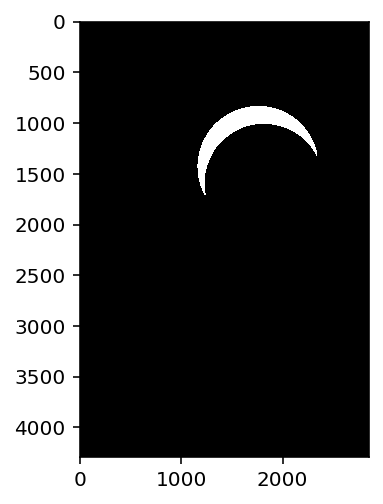

In [5]:
ret, thresh = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap="gray")
plt.show()

# Median Filter
[scipy.ndimage.median_filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)

`mode`
The mode parameter determines how the input array is extended when the filter overlaps a border. By passing a sequence of modes with length equal to the number of dimensions of the input array, different modes can be specified along each axis. Default value is `‘reflect’`. The valid values and their behavior is as follows:

`‘reflect’` (d c b a | a b c d | d c b a)

The input is extended by reflecting about the edge of the last pixel.

`‘constant’` (k k k k | a b c d | k k k k)

The input is extended by filling all values beyond the edge with the same constant value, defined by the cval parameter.

`‘nearest’` (a a a a | a b c d | d d d d)

The input is extended by replicating the last pixel.

`‘mirror’` (d c b | a b c d | c b a)

The input is extended by reflecting about the center of the last pixel.

`‘wrap’` (a b c d | a b c d | a b c d)

The input is extended by wrapping around to the opposite edge.

In [6]:
mf = ndimage.median_filter(thresh, size=5, mode="nearest")

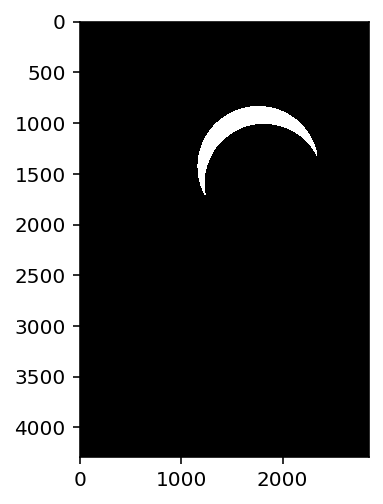

In [7]:
plt.imshow(mf, cmap="gray")
plt.show()

# Bounding Square
http://www.pianshen.com/article/4590348606/

In [8]:
x, y, w, h = cv2.boundingRect(mf)
x, y, w, h

(1157, 827, 1183, 885)

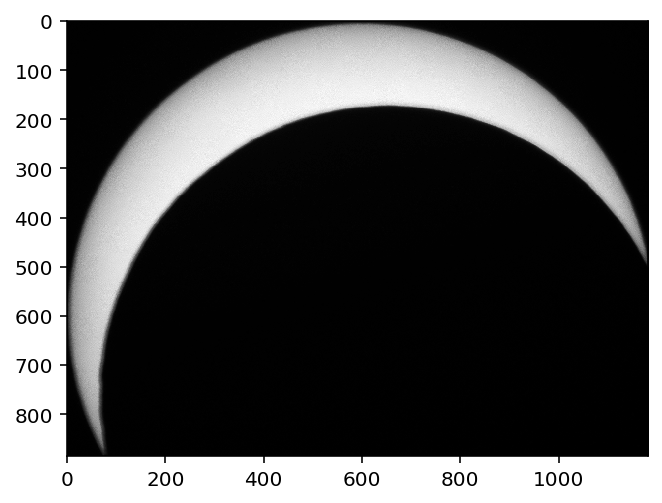

In [9]:
crop_img = img[y : y + h, x : x + w]
plt.imshow(crop_img, cmap="gray")
plt.show()

# main program

In [10]:
def img_process(img, threshold, mf_size, extend):
    # 影像二值化
    ret, thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    # median filter
    thresh = ndimage.median_filter(thresh, size=mf_size, mode="nearest")
    # 外切矩形（不一定是正方形）
    x, y, w, h = cv2.boundingRect(thresh)
    # 往外延伸 extend 個像素
    crop_img = img[y - extend : y + h + extend, x - extend : x + w + extend]
    return crop_img

In [11]:
def crop(file, output):
    # read image
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    # 調用 img_process
    crop_img = img_process(img=img, threshold=10, mf_size=5, extend=20)
    # 條件太鬆導致裁到很多背景
    # threshold 和 median filter 的 size 都變兩倍
    i = 2
    while crop_img.size > 1700000:  # 1700000 是後驗估計的
        crop_img = img_process(img=img, threshold=10 * i, mf_size=5 * i, extend=20)
        i += 1
        if i > 3:
            print(file, "too many background pixels!")
            break
    # write image
    cv2.imwrite(output, crop_img, [cv2.IMWRITE_JPEG_QUALITY, 100])

In [4]:
crop("original/019_85%.jpg", "crop/crop_019_85%.jpg")

In [ ]:
for f in os.listdir("original"):
    if ".jpg" in f:
        try:
            crop("original/" + f, "crop/crop_" + f)
        except Exception as e:
            print("crop_" + f, e)